In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
data=pd.read_csv("musteriler.csv")

In [66]:
data.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [67]:
x=data.iloc[:,3:]
x

,Hacim,Maas
0,69900,6325
1,79000,5200
2,85500,7825
3,17100,8375
4,5500,5450
...,...,...
195,96600,7900
196,83700,7675
197,34000,4000
198,42000,5500


In [68]:
from sklearn.cluster import KMeans

result=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=123)
    kmeans.fit(x)
    result.append(kmeans.inertia_) #intertia means WCSS

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

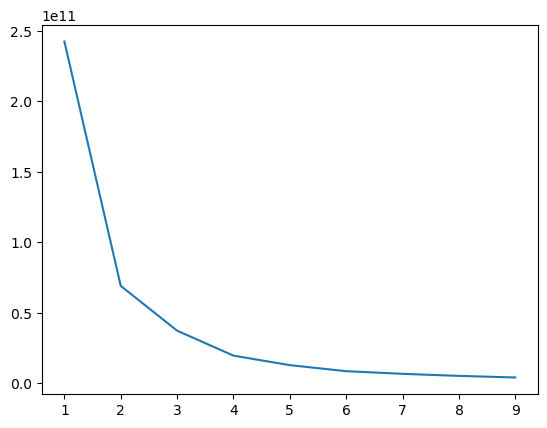

In [69]:
plt.plot(range(1,10),result)
plt.show()

As shown in the graph, it is evident that the optimal number of clusters can be determined by the clear elbow point at 2.

In [70]:
kmeans2=KMeans(n_clusters=2, init="k-means++",random_state=42)
y_kmeans=kmeans2.fit_predict(x)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


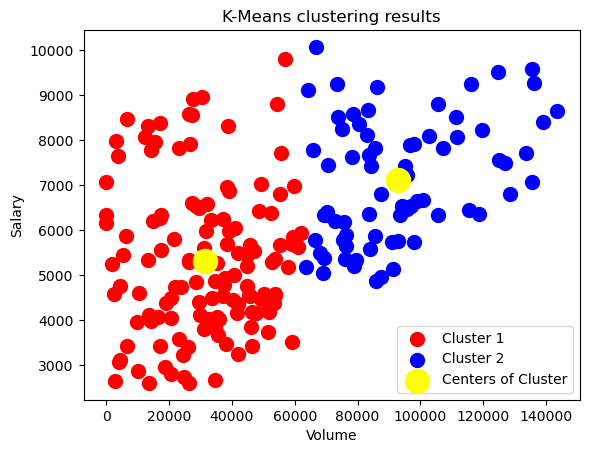

In [71]:
plt.scatter(x[y_kmeans==0]["Hacim"],x[y_kmeans==0]["Maas"],s=100,c="red",label="Cluster 1")
plt.scatter(x[y_kmeans==1]["Hacim"],x[y_kmeans==1]["Maas"],s=100,c="blue",label="Cluster 2")
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='yellow', label='Centers of Cluster')
plt.xlabel('Volume')
plt.ylabel('Salary')
plt.title('K-Means clustering results')
plt.legend()
plt.show()

Let's create a 3d chart using the Age, Volume and Salary columns.

In [72]:
data

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


In [73]:
data2=data.drop("No",axis=1)
data2

,Cinsiyet,Yas,Hacim,Maas
0,K,60,69900,6325
1,K,30,79000,5200
2,E,52,85500,7825
3,E,57,17100,8375
4,E,55,5500,5450
...,...,...,...,...
195,E,22,96600,7900
196,E,39,83700,7675
197,K,25,34000,4000
198,K,30,42000,5500


In [74]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
encoded=ohe.fit_transform(data2[["Cinsiyet"]]).toarray()
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(["Cinsiyet"]))


In [75]:
df=pd.concat([encoded_df,data2],axis=1)
df=df.drop("Cinsiyet",axis=1)
df



,Cinsiyet_E,Cinsiyet_K,Yas,Hacim,Maas
0,0.0,1.0,60,69900,6325
1,0.0,1.0,30,79000,5200
2,1.0,0.0,52,85500,7825
3,1.0,0.0,57,17100,8375
4,1.0,0.0,55,5500,5450
...,...,...,...,...,...
195,1.0,0.0,22,96600,7900
196,1.0,0.0,39,83700,7675
197,0.0,1.0,25,34000,4000
198,0.0,1.0,30,42000,5500


c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

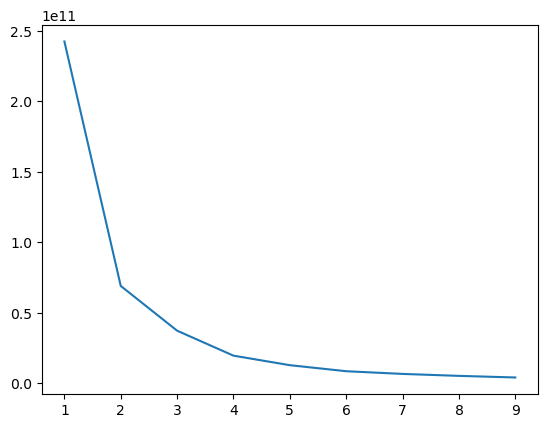

In [77]:
y=df.iloc[:,0:]
result2=[]
for j in range(1,10):
    kmeans3=KMeans(n_clusters=j,init="k-means++",random_state=42)
    kmeans3.fit(y)
    result2.append(kmeans3.inertia_) #intertia means WCSS
plt.plot(range(1,10),result2)
plt.show()

Again,as shown in the graph, it is evident that the optimal number of clusters can be determined by the clear elbow point at 2.

In [80]:
z=df[["Yas","Hacim","Maas"]]
kmeans4=KMeans(n_clusters=2, init="k-means++",random_state=42)
y_kmeans2=kmeans4.fit_predict(z)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


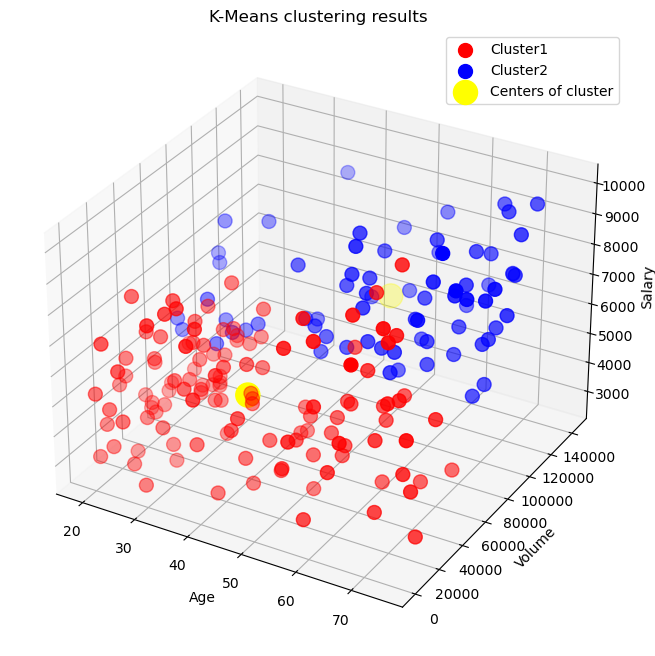

In [94]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(z[y_kmeans2==0]["Yas"],z[y_kmeans2==0]["Hacim"],z[y_kmeans2==0]["Maas"],c="red",s=100,label="Cluster1")
ax.scatter(z[y_kmeans2==1]["Yas"],z[y_kmeans2==1]["Hacim"],z[y_kmeans2==1]["Maas"],c="blue",s=100,label="Cluster2")
ax.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], kmeans4.cluster_centers_[:, 2], c='yellow', s=300, label='Centers of Cluster')

ax.set_xlabel('Age')
ax.set_ylabel('Volume')
ax.set_zlabel('Salary')

plt.title('K-Means clustering results')
plt.legend()
plt.show()